In [156]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [157]:
hd=pd.read_csv('heartdisease_data.csv')

In [158]:
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,the predicted attribute
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [159]:
hd['the predicted attribute'].value_counts()

1    56
0    51
3    42
2    41
4    10
Name: the predicted attribute, dtype: int64

In [160]:
hd.isnull().sum()

age                        0
sex                        0
cp                         0
trestbps                   0
chol                       0
fbs                        0
restecg                    0
thalach                    0
exang                      0
oldpeak                    0
slope                      0
ca                         0
thal                       0
the predicted attribute    0
dtype: int64

In [161]:
hd.dtypes

age                         int64
sex                         int64
cp                          int64
trestbps                   object
chol                       object
fbs                        object
restecg                     int64
thalach                    object
exang                      object
oldpeak                    object
slope                      object
ca                         object
thal                       object
the predicted attribute     int64
dtype: object

In [162]:
hd['trestbps'].value_counts()

?      56
120    16
130    15
140    10
150     9
110     9
160     8
122     6
142     5
144     4
170     4
126     4
136     4
134     4
128     4
124     4
132     3
158     3
180     2
125     2
152     2
138     2
155     2
116     2
154     2
104     2
112     2
100     1
114     1
190     1
96      1
127     1
0       1
118     1
172     1
146     1
156     1
106     1
135     1
102     1
178     1
Name: trestbps, dtype: int64

In [163]:
hd['trestbps'] = hd['trestbps'].replace(['?'],'NaN')

In [164]:
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,the predicted attribute
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,NaN,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,NaN,385,1,2,?,?,?,?,?,?,0


In [165]:
hd.isnull().sum()

age                        0
sex                        0
cp                         0
trestbps                   0
chol                       0
fbs                        0
restecg                    0
thalach                    0
exang                      0
oldpeak                    0
slope                      0
ca                         0
thal                       0
the predicted attribute    0
dtype: int64

In [166]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='mean')
hd['trestbps']=imp.fit_transform(hd['trestbps'].values.reshape(-1,1))

In [167]:
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,the predicted attribute
0,63,1,4,140.000000,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130.000000,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132.000000,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142.000000,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110.000000,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127.000000,333,1,1,154,0,0,?,?,?,1
196,62,1,1,133.763889,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122.000000,223,1,1,100,0,0,?,?,6,2
198,58,1,4,133.763889,385,1,2,?,?,?,?,?,?,0


In [168]:
hd['trestbps'].value_counts()

133.763889    56
120.000000    16
130.000000    15
140.000000    10
110.000000     9
150.000000     9
160.000000     8
122.000000     6
142.000000     5
134.000000     4
124.000000     4
136.000000     4
126.000000     4
144.000000     4
128.000000     4
170.000000     4
158.000000     3
132.000000     3
116.000000     2
152.000000     2
180.000000     2
154.000000     2
104.000000     2
112.000000     2
138.000000     2
155.000000     2
125.000000     2
102.000000     1
114.000000     1
156.000000     1
172.000000     1
190.000000     1
96.000000      1
118.000000     1
106.000000     1
135.000000     1
146.000000     1
178.000000     1
127.000000     1
0.000000       1
100.000000     1
Name: trestbps, dtype: int64

In [169]:
hd['chol'] = hd['chol'].replace(['?'],'NaN')
hd['fbs'] = hd['fbs'].replace(['?'],'NaN')
hd['thalach'] = hd['thalach'].replace(['?'],'NaN')
hd['exang'] = hd['exang'].replace(['?'],'NaN')
hd['oldpeak'] = hd['oldpeak'].replace(['?'],'NaN')
hd['slope'] = hd['slope'].replace(['?'],'NaN')
hd['ca'] = hd['ca'].replace(['?'],'NaN')
hd['thal'] = hd['thal'].replace(['?'],'NaN')

In [170]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='mean')
hd['fbs']=imp.fit_transform(hd['fbs'].values.reshape(-1,1))
hd['chol']=imp.fit_transform(hd['chol'].values.reshape(-1,1))
hd['exang']=imp.fit_transform(hd['exang'].values.reshape(-1,1))
hd['oldpeak']=imp.fit_transform(hd['oldpeak'].values.reshape(-1,1))
hd['slope']=imp.fit_transform(hd['slope'].values.reshape(-1,1))
hd['ca']=imp.fit_transform(hd['ca'].values.reshape(-1,1))
hd['thal']=imp.fit_transform(hd['thal'].values.reshape(-1,1))
hd['thalach']=imp.fit_transform(hd['thalach'].values.reshape(-1,1))

In [171]:
hd.isnull().sum()

age                        0
sex                        0
cp                         0
trestbps                   0
chol                       0
fbs                        0
restecg                    0
thalach                    0
exang                      0
oldpeak                    0
slope                      0
ca                         0
thal                       0
the predicted attribute    0
dtype: int64

In [172]:
hd.dtypes

age                          int64
sex                          int64
cp                           int64
trestbps                   float64
chol                       float64
fbs                        float64
restecg                      int64
thalach                    float64
exang                      float64
oldpeak                    float64
slope                      float64
ca                         float64
thal                       float64
the predicted attribute      int64
dtype: object

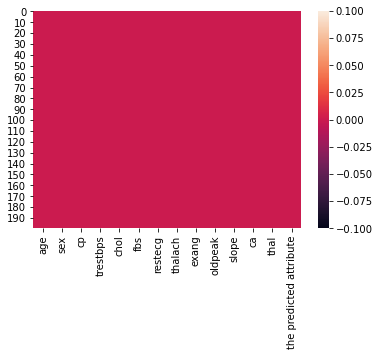

In [173]:
# Checking null values using heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(hd.isnull())

In [174]:
# Checking data info
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      200 non-null    int64  
 1   sex                      200 non-null    int64  
 2   cp                       200 non-null    int64  
 3   trestbps                 200 non-null    float64
 4   chol                     200 non-null    float64
 5   fbs                      200 non-null    float64
 6   restecg                  200 non-null    int64  
 7   thalach                  200 non-null    float64
 8   exang                    200 non-null    float64
 9   oldpeak                  200 non-null    float64
 10  slope                    200 non-null    float64
 11  ca                       200 non-null    float64
 12  thal                     200 non-null    float64
 13  the predicted attribute  200 non-null    int64  
dtypes: float64(9), int64(5)
me

Observation - There are total 200 rows and 14 columns. There is no missing values

In [175]:
# Checking columns name
hd.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'the predicted attribute'],
      dtype='object')

# Summary Statistics

In [176]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,the predicted attribute
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.0,200.000000,200.000000
mean,59.350000,0.970000,3.505000,133.763889,178.746114,0.352332,0.735000,122.795918,0.646259,1.320833,2.132653,0.0,6.294118,1.520000
std,7.811697,0.171015,0.795701,18.257507,112.011633,0.470440,0.683455,18.835692,0.410940,0.937755,0.466331,0.0,0.526001,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-0.500000,1.000000,0.0,3.000000,0.000000
25%,55.000000,1.000000,3.000000,125.750000,129.250000,0.000000,0.000000,112.000000,0.000000,1.000000,2.000000,0.0,6.294118,0.000000
50%,60.000000,1.000000,4.000000,133.763889,214.000000,0.000000,1.000000,122.795918,0.646259,1.320833,2.132653,0.0,6.294118,1.000000
75%,64.000000,1.000000,4.000000,140.000000,254.500000,1.000000,1.000000,130.000000,1.000000,2.000000,2.132653,0.0,6.294118,3.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.000000,1.000000,4.000000,3.000000,0.0,7.000000,4.000000


In [177]:
# Checking correlation 

hd_cor=hd.corr()
hd_cor

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,the predicted attribute
age,1.000000,0.034230,-0.038280,0.181584,0.066972,0.124753,0.002400,-0.149949,0.135050,0.157087,0.100039,NaN,0.084672,0.287289
sex,0.034230,1.000000,0.038036,0.012585,-0.096150,-0.055341,0.060621,-0.001592,0.016538,0.097267,0.088087,NaN,-0.078866,0.147470
cp,-0.038280,0.038036,1.000000,0.074638,0.065818,-0.047368,0.034790,-0.123597,0.181907,0.040155,0.028605,NaN,0.055794,0.168210
trestbps,0.181584,0.012585,0.074638,1.000000,0.150192,0.184605,0.092042,-0.013046,0.220327,0.115432,0.091688,NaN,0.082839,0.141719
chol,0.066972,-0.096150,0.065818,0.150192,1.000000,0.151512,0.024257,-0.041209,0.087302,0.002160,0.058552,NaN,-0.071654,0.076444
fbs,0.124753,-0.055341,-0.047368,0.184605,0.151512,1.000000,0.165927,0.051405,-0.213312,-0.099321,0.016262,NaN,0.026280,0.050515
restecg,0.002400,0.060621,0.034790,0.092042,0.024257,0.165927,1.000000,0.012348,-0.080575,-0.106991,-0.019306,NaN,0.052624,-0.032800
thalach,-0.149949,-0.001592,-0.123597,-0.013046,-0.041209,0.051405,0.012348,1.000000,-0.075057,0.172048,-0.122213,NaN,-0.203311,-0.079077
exang,0.135050,0.016538,0.181907,0.220327,0.087302,-0.213312,-0.080575,-0.075057,1.000000,0.309593,0.109706,NaN,0.122742,0.254926
oldpeak,0.157087,0.097267,0.040155,0.115432,0.002160,-0.099321,-0.106991,0.172048,0.309593,1.000000,0.226364,NaN,0.090996,0.378209


In [178]:
hd['ca'].value_counts()

0.0    200
Name: ca, dtype: int64

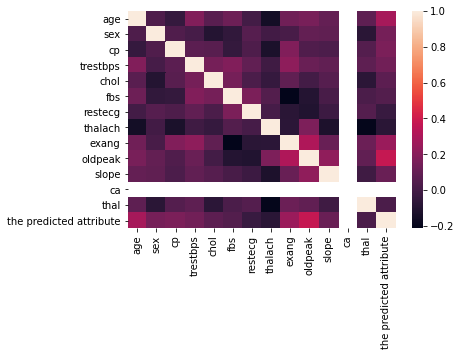

In [179]:
# Use heatmap to check correlation for better understanding.
sns.heatmap(data=hd_cor)

# Data Visualization
Univariate Analysis

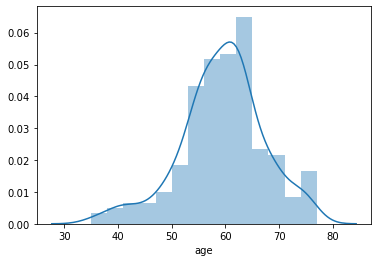

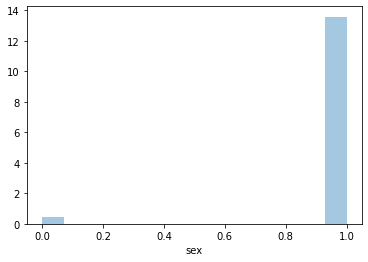

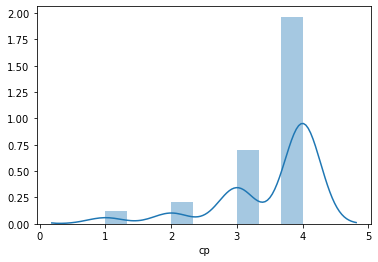

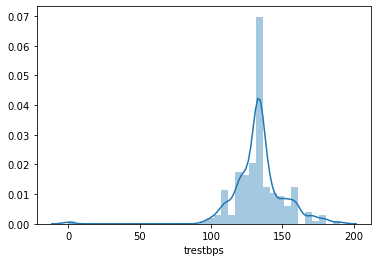

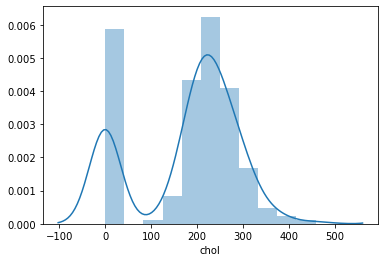

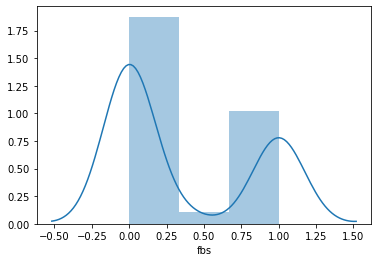

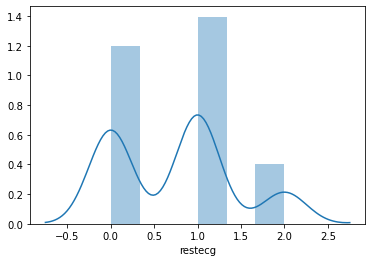

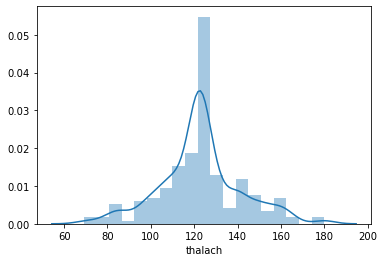

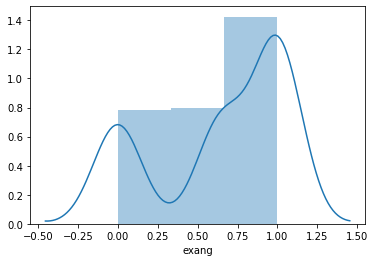

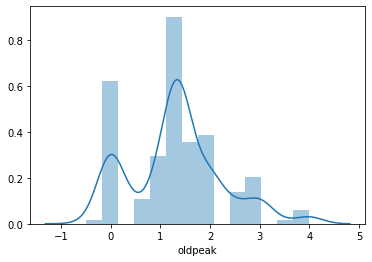

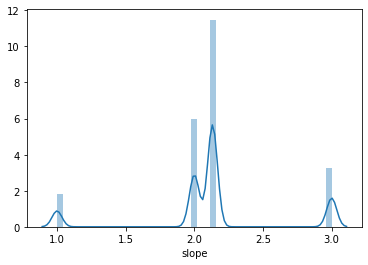

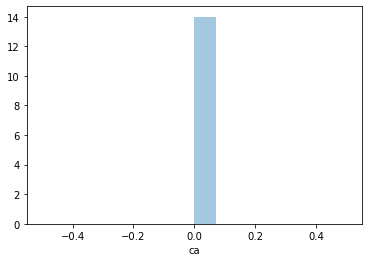

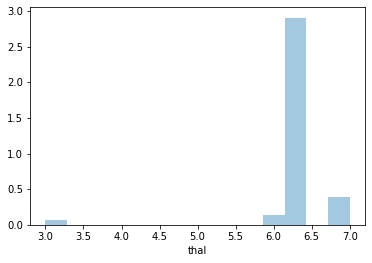

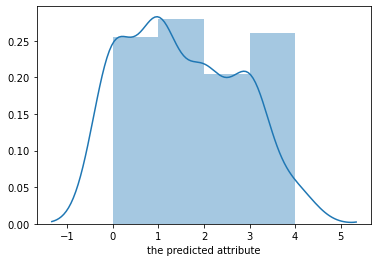

In [180]:
for i in hd.columns:
    sns.distplot(hd[i])
    plt.show()

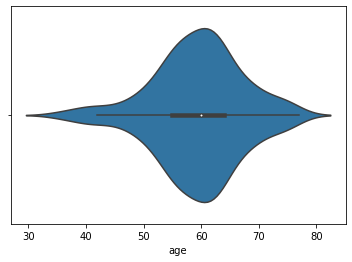

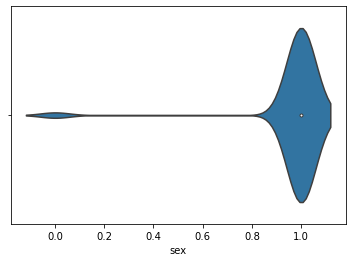

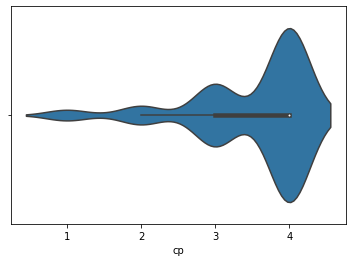

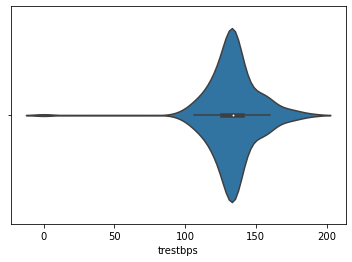

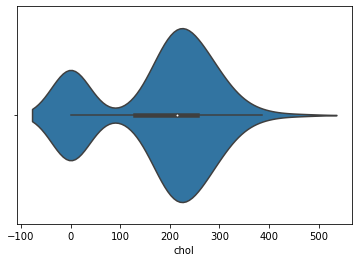

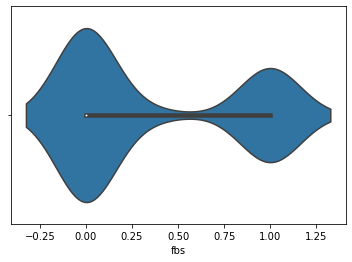

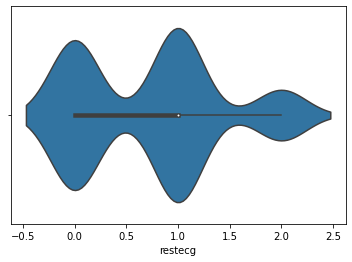

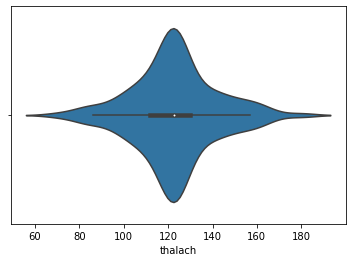

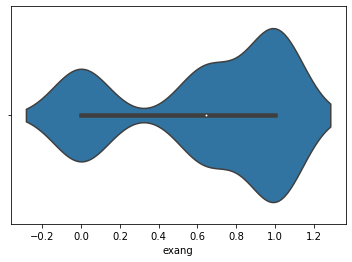

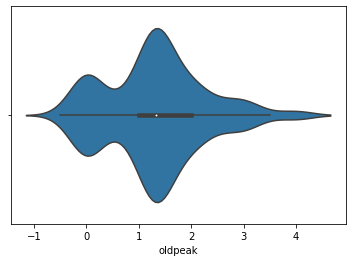

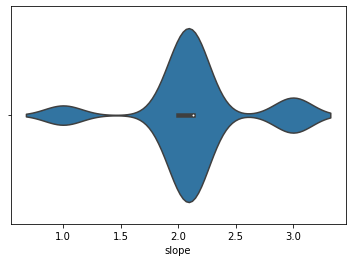

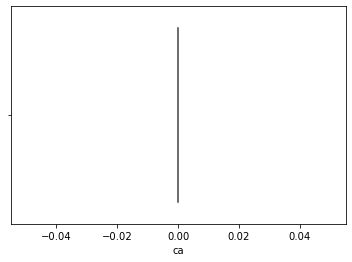

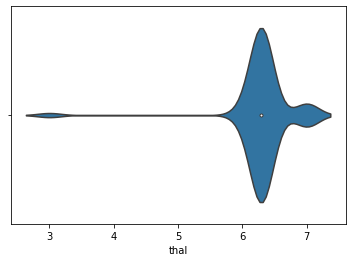

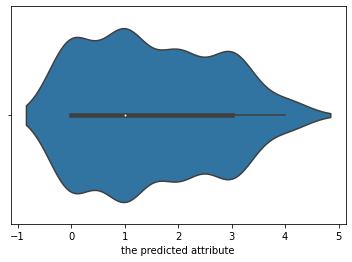

In [181]:
for i in hd.columns:
    sns.violinplot(hd[i])
    plt.show()

# Bivariate Analysis

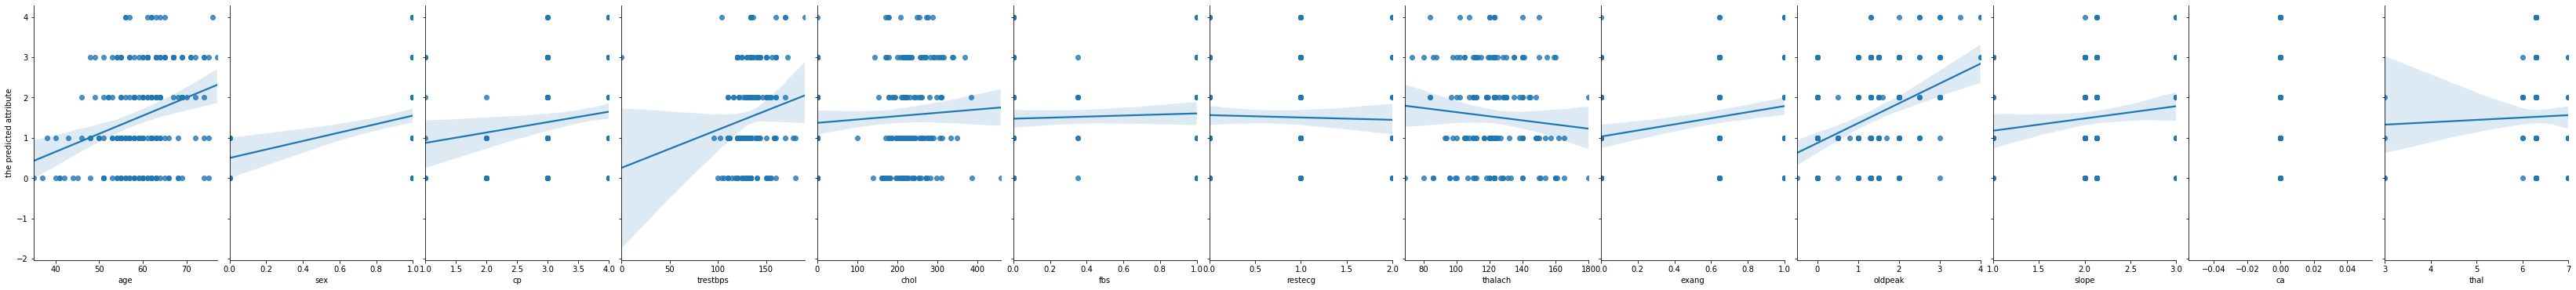

In [182]:
sns.pairplot(hd, x_vars=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal' ], y_vars='the predicted attribute', size=5, height=2.5, aspect=0.7, kind='reg')

# Plotting Outliers

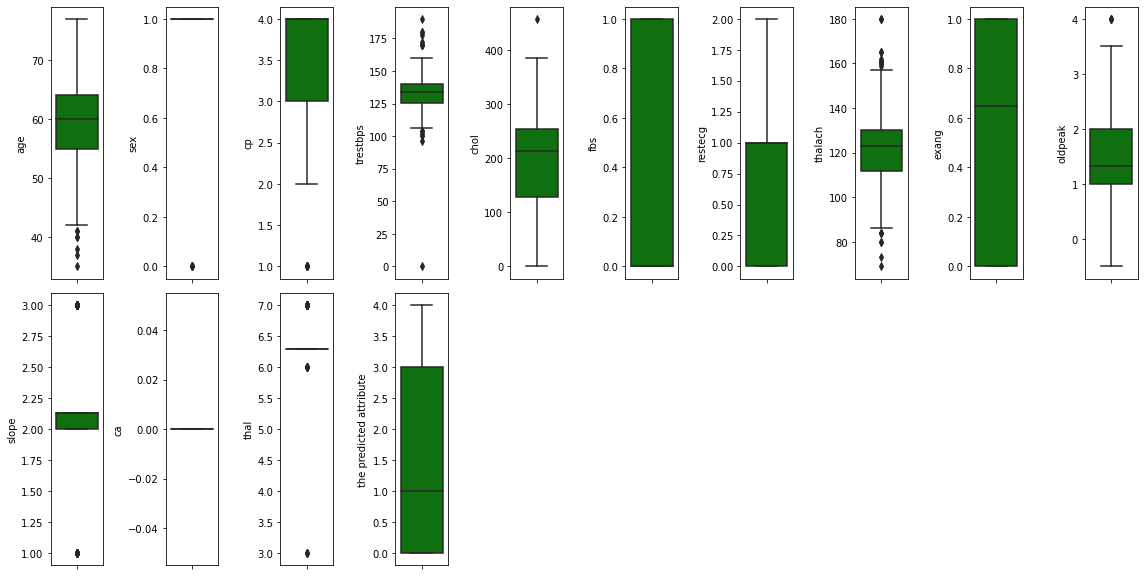

In [183]:
collist=hd.columns.values
ncol=10
nrow=5

plt.figure(figsize=(16,20))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(hd[collist[i]],color='green',orient='v')
    plt.tight_layout()

# Removing Outliers

In [184]:
list1=pd.DataFrame(hd.drop(columns=['ca']))
from scipy.stats import zscore
z=np.abs(zscore(list1))
z

array([[4.68420533e-01, 1.75863115e-01, 6.23653755e-01, ...,
        2.85174820e-01, 1.69278480e-15, 3.94610899e-01],
       [1.96993293e+00, 1.75863115e-01, 6.23653755e-01, ...,
        9.54693840e-16, 1.69278480e-15, 1.24960118e+00],
       [8.34173552e-02, 1.75863115e-01, 6.23653755e-01, ...,
        1.86460459e+00, 1.69278480e-15, 3.94610899e-01],
       ...,
       [5.58254608e-01, 1.75863115e-01, 6.23653755e-01, ...,
        9.54693840e-16, 5.60560662e-01, 3.94610899e-01],
       [1.73251430e-01, 1.75863115e-01, 6.23653755e-01, ...,
        9.54693840e-16, 1.69278480e-15, 1.24960118e+00],
       [3.40086140e-01, 1.75863115e-01, 1.89615940e+00, ...,
        9.54693840e-16, 1.69278480e-15, 4.27495141e-01]])

In [185]:
threshold=3
print(np.where(z>3))

(array([ 12,  24,  33,  51,  66,  70,  72,  76,  79,  96,  97, 126, 128,
       131, 133, 137, 171, 176, 189, 190, 194, 195, 196], dtype=int64), array([11,  7,  3,  1,  2,  7,  2,  2,  1,  0,  2,  1,  1,  2,  2,  2, 11,
        3, 11,  1, 11,  1,  2], dtype=int64))


In [186]:
hd_new=list1[(z<3).all(axis=1)]

In [187]:
hd_new.shape

(177, 13)

In [188]:
hd.shape

(200, 14)

# To check the distribution of Skewness

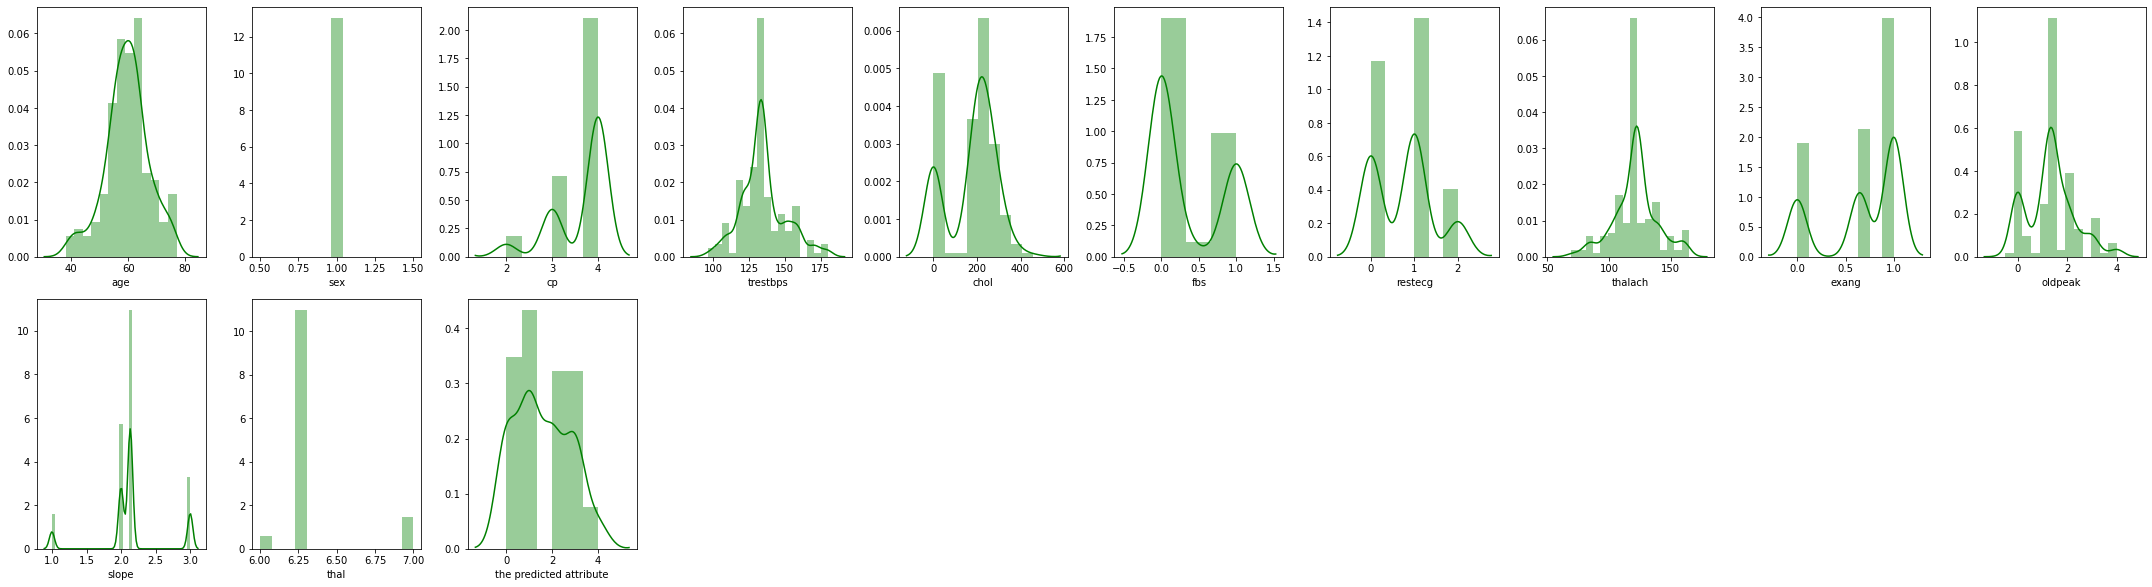

In [189]:


collist5=hd_new.columns.values
plt.figure(figsize=(30,20))
for i in range(0,len(collist5)):
    plt.subplot(nrow,ncol,i+1)
    sns.distplot(hd_new[collist5[i]],color='green')
    plt.tight_layout()

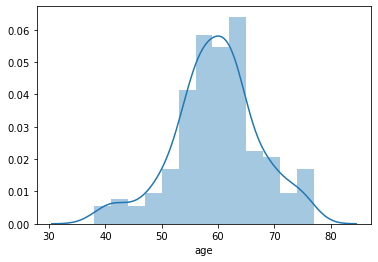

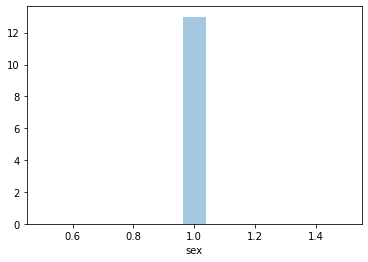

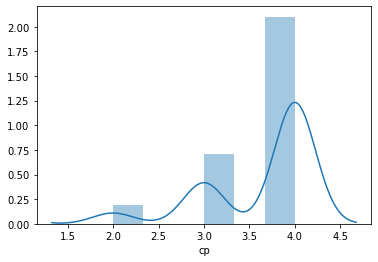

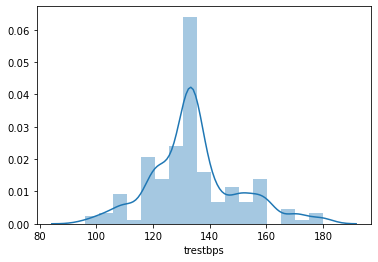

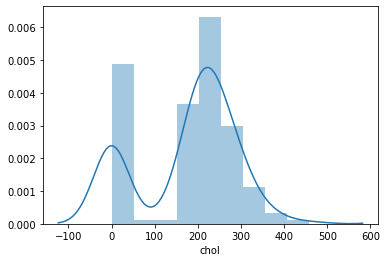

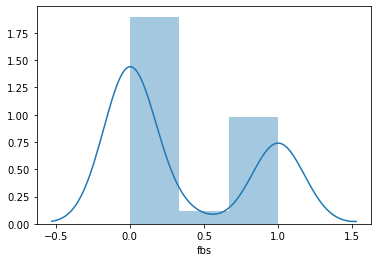

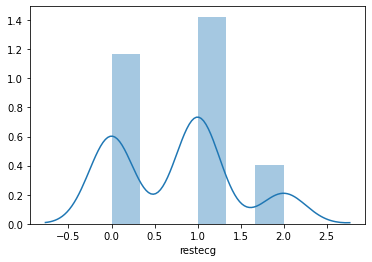

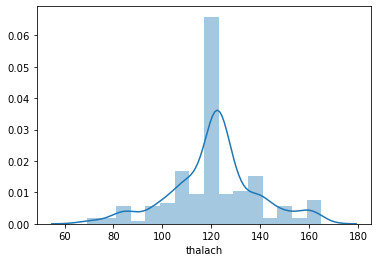

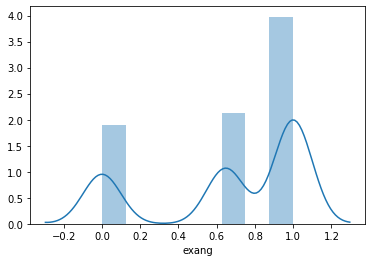

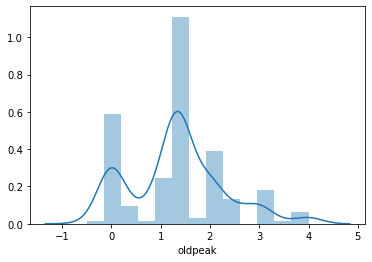

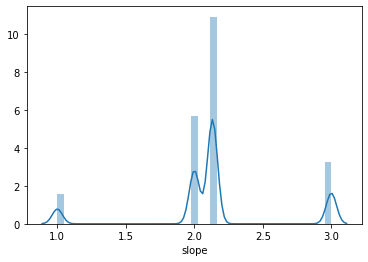

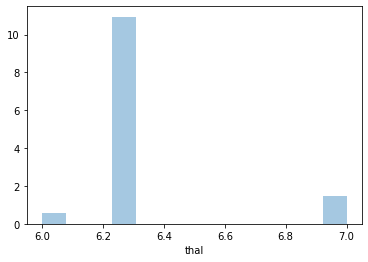

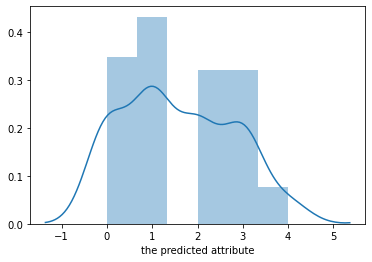

In [190]:
for i in hd_new.columns:
    sns.distplot(hd_new[i])
    plt.show()

In [191]:
hd_new.skew()

age                       -0.258590
sex                        0.000000
cp                        -1.439012
trestbps                   0.509657
chol                      -0.537742
fbs                        0.686611
restecg                    0.366437
thalach                   -0.105998
exang                     -0.827606
oldpeak                    0.424375
slope                     -0.170886
thal                       2.079564
the predicted attribute    0.259635
dtype: float64

In [192]:
# Treating skewness via log method

for col in hd_new.columns:
    if hd_new[col].skew()>0.55:
        hd_new[col]=np.log1p(hd_new[col])

In [193]:
hd_new.skew()

age                       -0.258590
sex                        0.000000
cp                        -1.439012
trestbps                   0.509657
chol                      -0.537742
fbs                        0.663964
restecg                    0.366437
thalach                   -0.105998
exang                     -0.827606
oldpeak                    0.424375
slope                     -0.170886
thal                       2.025123
the predicted attribute    0.259635
dtype: float64

In [194]:
# Separating data into input and output variables.

wd_x=hd_new.drop(columns=['the predicted attribute'])
y=pd.DataFrame(hd_new['the predicted attribute'])

In [195]:
y

,the predicted attribute
0,2
1,0
2,2
3,1
4,0
...,...
192,3
193,1
197,2
198,0


In [196]:
# Scaling the input Variable

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(wd_x)
x=pd.DataFrame(x,columns=wd_x.columns)

In [197]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal
0,0.455808,0.0,0.606751,0.342887,0.742777,-0.741734,0.374532,-0.523570,0.825963,1.761409,-0.317189,-0.275809
1,-2.069533,0.0,0.606751,-0.302209,0.286396,-0.741734,0.374532,0.325899,-1.667739,-1.399484,-0.030072,-0.275809
2,0.057070,0.0,0.606751,-0.173190,0.366934,-0.741734,0.374532,1.062107,0.825963,0.180963,1.847231,-0.275809
3,-0.607494,0.0,0.606751,0.471906,0.456421,-0.741734,0.374532,1.571788,0.825963,1.234594,-2.481608,-0.275809
4,0.854546,0.0,-1.071295,-1.592402,0.322191,1.408813,1.847692,-1.259777,0.825963,-0.029764,-0.317189,-0.275809
...,...,...,...,...,...,...,...,...,...,...,...,...
172,-0.873319,0.0,0.606751,0.600926,1.100724,1.408813,0.374532,0.382531,0.825963,0.180963,-0.317189,-0.275809
173,0.322895,0.0,0.606751,1.504061,-0.062601,-0.741734,0.374532,0.948844,0.825963,-1.399484,-0.030072,-0.275809
174,-0.607494,0.0,0.606751,-0.818286,0.411677,1.408813,0.374532,-1.203146,-1.667739,-1.399484,-0.030072,-1.599258
175,-0.208756,0.0,0.606751,-0.059402,1.861359,1.408813,1.847692,0.087817,-0.056163,-0.007813,-0.030072,-0.275809


In [198]:
y

,the predicted attribute
0,2
1,0
2,2
3,1
4,0
...,...
192,3
193,1
197,2
198,0


In [199]:
# Make input and output variables into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

In [200]:
# Checking train and test data size
print(x_train.shape,'\t',x_test.shape)

(141, 12) 	 (36, 12)


In [201]:
print(y_train.shape,'\t',y_test.shape)

(141, 1) 	 (36, 1)


In [202]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

model=[GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m, 'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of GaussianNB() is:
0.19444444444444445
[[0 2 0 0 0]
 [2 2 0 0 6]
 [0 3 0 1 8]
 [1 0 0 1 5]
 [1 0 0 0 4]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.29      0.20      0.24        10
           2       0.00      0.00      0.00        12
           3       0.50      0.14      0.22         7
           4       0.17      0.80      0.29         5

    accuracy                           0.19        36
   macro avg       0.19      0.23      0.15        36
weighted avg       0.20      0.19      0.15        36



Accuracy score of SVC() is:
0.3055555555555556
[[0 2 0 0 0]
 [3 6 0 1 0]
 [0 9 0 3 0]
 [0 1 1 5 0]
 [1 2 0 2 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.30      0.60      0.40        10
           2       0.00      0.00      0.00        12
           3       0.45      0.71      0.56         7
    

In [203]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100,random_state=42,criterion='gini')
#RandomForestClassifier(100)---Default
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.2222222222222222
[[0 2 0 0 0]
 [4 5 1 0 0]
 [0 6 0 6 0]
 [0 4 0 3 0]
 [1 1 2 1 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.28      0.50      0.36        10
           2       0.00      0.00      0.00        12
           3       0.30      0.43      0.35         7
           4       0.00      0.00      0.00         5

    accuracy                           0.22        36
   macro avg       0.12      0.19      0.14        36
weighted avg       0.14      0.22      0.17        36



In [204]:
# Finding out best paramter using GridsearchCV
dtc=DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['gini', 'entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
svc=SVC()
gs=GridSearchCV(dtc,parameters)
gs.fit(x,y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150]})

In [205]:
print(gs.best_params_)

{'criterion': 'entropy', 'max_depth': 70}


In [206]:
#Using DecisionTreeClassifier() model with best results
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=150)
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print('Accuracy score of',dtc, 'is:')
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))
print('\n')

Accuracy score of DecisionTreeClassifier(criterion='entropy', max_depth=150) is:
0.3055555555555556
[[1 1 0 0 0]
 [3 6 0 1 0]
 [2 3 2 3 2]
 [0 3 1 2 1]
 [2 1 1 1 0]]
              precision    recall  f1-score   support

           0       0.12      0.50      0.20         2
           1       0.43      0.60      0.50        10
           2       0.50      0.17      0.25        12
           3       0.29      0.29      0.29         7
           4       0.00      0.00      0.00         5

    accuracy                           0.31        36
   macro avg       0.27      0.31      0.25        36
weighted avg       0.35      0.31      0.29        36





# Using Ensemble Technique to boostup score

In [207]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100,random_state=42,criterion='gini')
#RandomForestClassifier(100)---Default
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.2222222222222222
[[0 2 0 0 0]
 [4 5 1 0 0]
 [0 6 0 6 0]
 [0 4 0 3 0]
 [1 1 2 1 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.28      0.50      0.36        10
           2       0.00      0.00      0.00        12
           3       0.30      0.43      0.35         7
           4       0.00      0.00      0.00         5

    accuracy                           0.22        36
   macro avg       0.12      0.19      0.14        36
weighted avg       0.14      0.22      0.17        36



In [208]:
from sklearn.ensemble import AdaBoostClassifier

ad=AdaBoostClassifier(n_estimators=100,random_state=42,base_estimator=dtc,algorithm='SAMME',learning_rate=0.01)
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.3055555555555556
[[1 1 0 0 0]
 [2 5 2 1 0]
 [1 4 3 2 2]
 [0 3 1 2 1]
 [2 1 2 0 0]]
              precision    recall  f1-score   support

           0       0.17      0.50      0.25         2
           1       0.36      0.50      0.42        10
           2       0.38      0.25      0.30        12
           3       0.40      0.29      0.33         7
           4       0.00      0.00      0.00         5

    accuracy                           0.31        36
   macro avg       0.26      0.31      0.26        36
weighted avg       0.31      0.31      0.29        36



In [209]:
ad=AdaBoostClassifier(n_estimators=50)
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.1388888888888889
[[1 1 0 0 0]
 [3 3 1 3 0]
 [6 4 1 1 0]
 [2 2 3 0 0]
 [1 2 0 2 0]]
              precision    recall  f1-score   support

           0       0.08      0.50      0.13         2
           1       0.25      0.30      0.27        10
           2       0.20      0.08      0.12        12
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         5

    accuracy                           0.14        36
   macro avg       0.11      0.18      0.10        36
weighted avg       0.14      0.14      0.12        36



In [210]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()

gb.fit(x_train,y_train)

gba=gb.predict(x_test)
print(accuracy_score(y_test,gba))
print(confusion_matrix(y_test,gba))
print(classification_report(y_test,gba))

0.25
[[1 1 0 0 0]
 [5 4 1 0 0]
 [2 6 1 3 0]
 [1 3 0 3 0]
 [1 1 0 3 0]]
              precision    recall  f1-score   support

           0       0.10      0.50      0.17         2
           1       0.27      0.40      0.32        10
           2       0.50      0.08      0.14        12
           3       0.33      0.43      0.38         7
           4       0.00      0.00      0.00         5

    accuracy                           0.25        36
   macro avg       0.24      0.28      0.20        36
weighted avg       0.31      0.25      0.22        36



In [211]:
# Finding out best paramter using GridsearchCV
from sklearn.model_selection import GridSearchCV
parameters={'random_state':range(35,100)}
gc=GridSearchCV(dtc,parameters)
gc.fit(x,y)
gc.best_params_

{'random_state': 79}

In [212]:
from sklearn.ensemble import AdaBoostClassifier

ad=AdaBoostClassifier(n_estimators=100,random_state=79,base_estimator=dtc,algorithm='SAMME',learning_rate=0.01)

ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.3333333333333333
[[1 1 0 0 0]
 [2 6 2 0 0]
 [2 3 3 2 2]
 [0 3 1 2 1]
 [2 1 2 0 0]]
              precision    recall  f1-score   support

           0       0.14      0.50      0.22         2
           1       0.43      0.60      0.50        10
           2       0.38      0.25      0.30        12
           3       0.50      0.29      0.36         7
           4       0.00      0.00      0.00         5

    accuracy                           0.33        36
   macro avg       0.29      0.33      0.28        36
weighted avg       0.35      0.33      0.32        36



Note - Find out best result with AdaBoostClassifier by using varius technics. So i will save AdaBoostClassifier as my final model.

In [213]:
# Saving the AdaBoostClassifier
import joblib
joblib.dump(ad,'Heart Disease.pkl')

['Heart Disease.pkl']